In [142]:
import os
import sys
sys.path.append("E:/DataScience/")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from mltool.dataImport import read_csv_excel
from mltool.featureTransform import distribution_transform
from mltool.featureTransform import feature_classification

# 1.数据读取

In [143]:
reader = read_csv_excel.read_train_test(trainPath = "./data/train.csv", 
                                        testPath = "./data/test.csv",
                                        targetName = "SalePrice")
train, trainId = reader.read_train()
test, testId = reader.read_test()
all_data = reader.data_union(train, test)
train_target = reader.get_train_target(train)

E:/DataScience\mltool\dataImport\read_csv_excel.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  data_union = pd.concat((train, test)).reset_index(drop = True)


In [144]:
print(train.shape)
print(test.shape)
print(all_data.shape)
print()
print(trainId.shape)
print(testId.shape)
print(train_target.shape)

(1460, 80)
(1459, 79)
(2919, 79)

(1460,)
(1459,)
(1460,)


# 2.探索性数据分析、数据预处理

* 目标变量正态性转换

## 2.1目标变量SalePrice正态性转换

#### (1) 目标变量分布

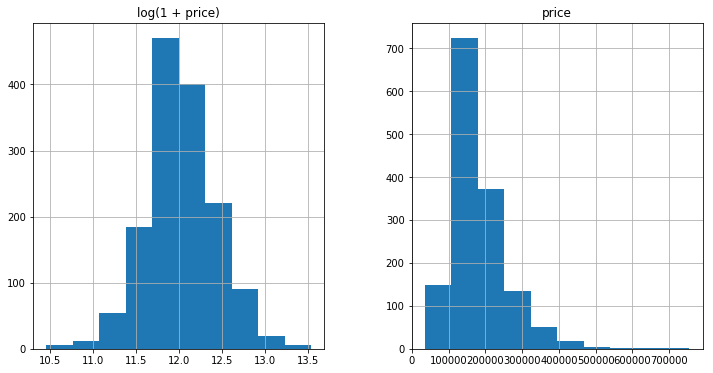

In [145]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({
    'price': train_target,
    'log(1 + price)': distribution_transform.log_trans_norm(train_target)
})
prices.hist();

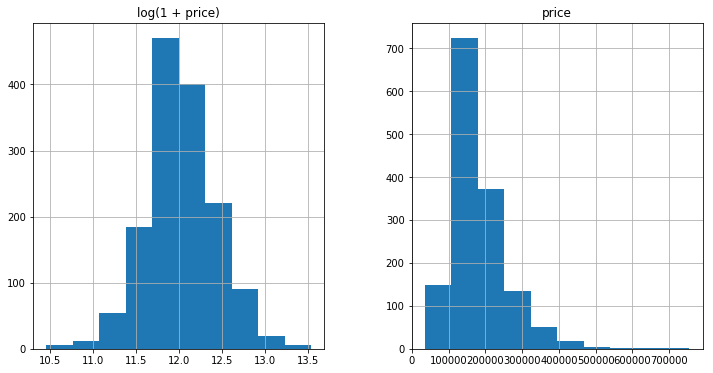

In [146]:
distribution_transform.feature_hist(train_target)

#### (2) 目标变量转换

In [162]:
train_target = distribution_transform.log_trans_norm(train_target)

## 2.2 数值型变量与类别性变量分别处理

### (1) 分离数值型变量和类别性变量

In [148]:
numeric_categorical_split.feature_dtype(all_data)

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
Functional        object
GarageArea       float64
GarageCars       float64
GarageCond        object
GarageFinish      object
GarageQual        object
GarageType        object
GarageYrBlt      float64
GrLivArea          int64
HalfBath           int64


### (2) 数值型变量

In [149]:
num_feat, num_feat_index, cate_feat, cate_feat_index = feature_classification.numeric_categorical_features(data = all_data, limit_value = 0)

In [150]:
num_feat.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,5,7,0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,5,7,0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,5,7,0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,5,8,0,0,9,1145.0,192,2000,2000,2008


In [151]:
num_feat_index

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

### （3）类别性变量

In [152]:
cate_feat.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


In [153]:
cate_feat_index

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

### （4）数值型变量预处理

* 偏态分布变量
    - log转换
* 

In [158]:
skewed_feat, skewed_feat_index = feature_classification.skewed_features(data = all_data, num_feat_idx = num_feat_index, limit_value = 0.75)

In [160]:
skewed_feat_index

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF'],
      dtype='object')

1stFlrSF         1083
2ndFlrSF          635
3SsnPorch          31
Alley               3
BedroomAbvGr        8
BldgType            5
BsmtCond            5
BsmtExposure        5
BsmtFinSF1        992
BsmtFinSF2        273
BsmtFinType1        7
BsmtFinType2        7
BsmtFullBath        6
BsmtHalfBath        5
BsmtQual            5
BsmtUnfSF        1136
CentralAir          2
Condition1          9
Condition2          8
Electrical          6
EnclosedPorch     183
ExterCond           5
ExterQual           4
Exterior1st        16
Exterior2nd        17
Fence               5
FireplaceQu         6
Fireplaces          5
Foundation          6
FullBath            5
                 ... 
LotFrontage       614
LotShape            4
LowQualFinSF       36
MSSubClass         16
MSZoning            6
MasVnrArea        467
MasVnrType          5
MiscFeature         5
MiscVal            38
MoSold             12
Neighborhood       25
OpenPorchSF       252
OverallCond         9
OverallQual        10
PavedDrive

### （5）类别性变量预处理